# Figure 7 - Map
This notebook can be used to reproduce figure 5 of the manuscript

Requirements:
- Pandas: https://pandas.pydata.org/
- PyGMT: https://www.pygmt.org/

In [1]:
import pandas as pd
import pygmt

# read volcano list
df = pd.read_excel('../database/Catalogue_v1.0.xlsx',header=[0],sheet_name="Volcanoes")

# Fix data type
df.Volcano_Number = df.Volcano_Number.fillna(0).astype(int)
df.Primary_Volcano_Type = df.Primary_Volcano_Type.astype(dtype="category")

df.head()

begin [INFORMATION]: Creating a workflow directory /Users/michpaulatto/.gmt/sessions/gmt_session.29755


,Volcano_Name,Location,Country,Region,Subregion,Volcano_Number,Longitude,Latitude,Tectonic_Setting,Primary_Volcano_Type,Elevation,Major_Rock_Type,Last_Eruption_Year,Max_Erupted_Volume,Max_VEI
0,Agung,Bali,Indonesia,NaN,Indonesia,264020,115.508,-8.343,Subduction,Stratovolcano,2997.0,Andesite,2019 CE,NaN,NaN
1,Aira,Kyushu,Japan,NaN,Japan,282080,130.657,31.593,Subduction,Caldera,1117.0,Andesite,2021 CE,NaN,NaN
2,Akutan,Alaska,USA,NaN,USA,311320,-165.986,54.134,Subduction,Stratovolcano,1303.0,Basalt - andesite,1992 CE,NaN,NaN
3,Asama,Honshu,Japan,NaN,Japan,283110,138.523,36.406,Subduction,Complex,2568.0,Andesite,2019 CE,NaN,NaN
4,Askja,Iceland,Iceland,NaN,Iceland,373060,-16.783,65.033,Rift,Stratovolcano,1080.0,Basalt,1961 CE,NaN,5.0


In [2]:
# Load global topography
grid = pygmt.datasets.load_earth_relief(resolution="15m")

Stratovolcano Blue
Shield Black
Complex Orange
Caldera Red


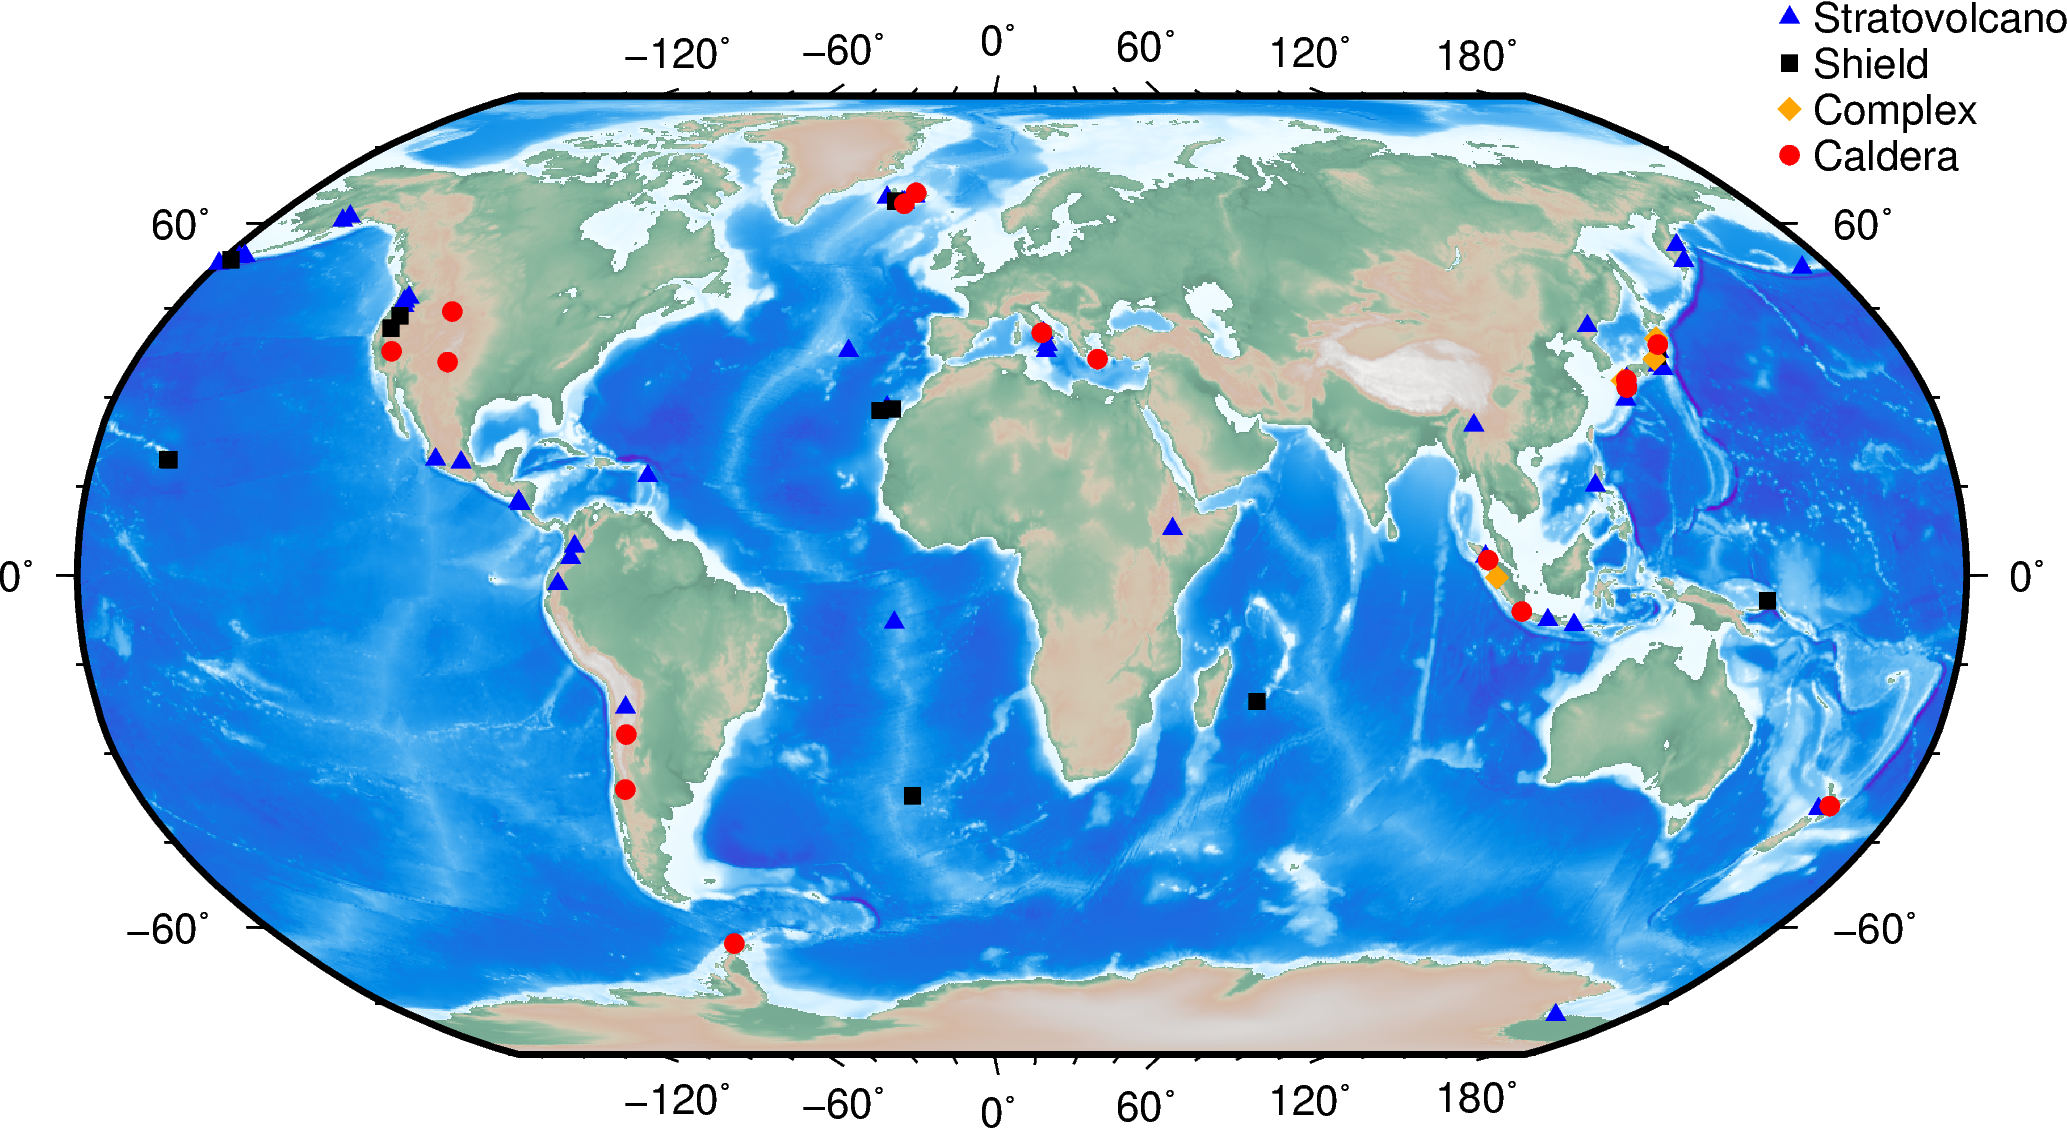

In [16]:
#Define lat and lon
lon=df.Longitude
lat=df.Latitude
# Projection for plot
proj="N10/16c"


fig = pygmt.Figure()
pygmt.config(FONT="10p,Helvetica,black")
pygmt.config(FONT_ANNOT_PRIMARY="10p,Helvetica,black")

fig.grdimage(grid=grid, projection=proj, cmap="terra")
fig.basemap(projection=proj,frame=True)

colors=["Blue","Black","Orange","Red"]
styles=["t0.2c","s0.2c","d0.2c","c0.17c"]
        
for it,vtype in enumerate(df.Primary_Volcano_Type.cat.categories[::-1]):
            lon=df.Longitude[df.Primary_Volcano_Type==vtype]
            lat=df.Latitude[df.Primary_Volcano_Type==vtype]
            color=colors[it]
            style=styles[it]
            print(vtype,color)
            fig.plot(x=lon,y=lat,
                style=style,
                projection=proj,
                color=color,
                no_clip=True,
                label=f"{vtype}"
                )
     
fig.legend(projection=proj,box=False, position="JTR+jTR+o-1.0c")

fig.show()

# Save to file
fig.savefig("paperfigures/Fig_7_map.pdf")
fig.savefig("paperfigures/Fig_7_map.png")
